Epoch 1/3
60000/60000 [==============================]60000/60000 [==============================] - 17s 277us/step - loss: 0.2660 - acc: 0.9205

Epoch 2/3
60000/60000 [==============================]60000/60000 [==============================] - 16s 260us/step - loss: 0.1083 - acc: 0.9670

Epoch 3/3
60000/60000 [==============================]60000/60000 [==============================] - 14s 238us/step - loss: 0.0746 - acc: 0.9766

10000/10000 [==============================]10000/10000 [==============================] - 1s 97us/step

0.092192802907 0.971
7


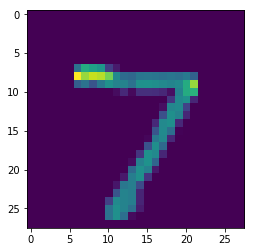

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist #dataset of 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() # unpack the dataset, x_train=pixel values of the 28x28px images, y_train= labels(0-9)

x_train = tf.keras.utils.normalize(x_train, axis= 1) # normalize so tha the values are scaled between 0 and 1(it makes it easier for a network to learn, comment those to lines to see how it affects the kearning process)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #build the model
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #input layer 

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a "fully connected" first hidden layer of 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # a "fully connected" second hidden layer of 128 neurons

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer, 10 classifications

#training parameters
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train, epochs=3) #train the model

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc) # does it overfit?? we expect slightly higher loss and slightly less accuracy. TODO: search why huge delta-> probably overfit

model.save('begginerNumberReader.model')

new_model = tf.keras.models.load_model('begginerNumberReader.model')

predictions = new_model.predict([x_test]) # predictions are probability distributions

print(np.argmax(predictions[0])) # let's see the prediction of the 0th element
plt.imshow(x_test[0]) 
plt.show() # an image worth of a thousand words(or numbers:P)

In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================]10000/10000 [==============================] - 1s 88us/step

0.10015199437 0.9696


In [13]:
model.save('myFirstLittleTinyBabyUltraBegginerNumberReader.model')

In [14]:
new_model = tf.keras.models.load_model('myFirstLittleTinyBabyUltraBegginerNumberReader.model')

In [15]:
predictions = new_model.predict([x_test])

7


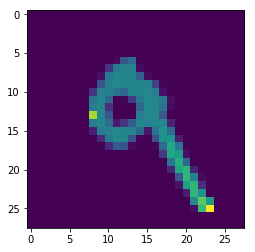

In [25]:
import numpy as np
import matplotlib.pyplot as plt

print(np.argmax(predictions[0]))
plt.imshow(x_test[7])
plt.show()


In [19]:
plt.imshow(x_test[0])
plt.show()


NameError: name 'plt' is not defined